In [6]:
import numpy as np
import pandas as pd

### Importar datos

In [7]:
data=np.load("C:/Users/jfphe/MASTER_DS_GALILEO/proyecto_data/proyecto_training_data.npy")
data=pd.DataFrame(data)
data.columns =['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt','LotFrontage']
data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Separar data de entrenamiento de la data test

In [8]:
p_train = 0.8 # Porcentaje de train.

data['train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['train']==True], data[data['train']==False]
data = data.drop('train', 1)
train = train.drop('train', 1)
test = test.drop('train', 1)

In [9]:
train.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0


In [10]:
test.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
15,132000.0,7.0,854.0,5.0,1929.0,51.0
19,139000.0,5.0,1339.0,6.0,1958.0,70.0


In [52]:
#data.agg({'SalePrice': ['mean', 'min', 'max', "std"]})

,SalePrice
mean,180921.195890
min,34900.000000
max,755000.000000
std,79442.502883


### Estadística descriptiva de variables del dataset

In [11]:
summary=pd.DataFrame([(round(data["SalePrice"].mean(),2),
                        round(data["SalePrice"].max(),2),
                        round(data["SalePrice"].min(),2),
                        round(data["SalePrice"].max()-data["SalePrice"].min(),2),
                        round(data["SalePrice"].std(),2)),
                       (round(data["OverallQual"].mean(),2),
                        round(data["OverallQual"].max(),2),
                        round(data["OverallQual"].min(),2),
                        round(data["OverallQual"].max()-data["OverallQual"].min(),2),
                        round(data["OverallQual"].std(),2)),
                       (round(data["1stFlrSF"].mean(),2),
                        round(data["1stFlrSF"].max(),2),
                        round(data["1stFlrSF"].min(),2),
                        round(data["1stFlrSF"].max()-data["1stFlrSF"].min(),2),
                        round(data["1stFlrSF"].std(),2)), 
                       (round(data["TotRmsAbvGrd"].mean(),2),
                        round(data["TotRmsAbvGrd"].max(),2),
                        round(data["TotRmsAbvGrd"].min(),2),
                        round(data["TotRmsAbvGrd"].max()-data["TotRmsAbvGrd"].min(),2),
                        round(data["TotRmsAbvGrd"].std(),2)),
                       (round(data["YearBuilt"].mean(),2),
                        round(data["YearBuilt"].max(),2),
                        round(data["YearBuilt"].min(),2),
                        round(data["YearBuilt"].max()-data["YearBuilt"].min(),2),
                        round(data["YearBuilt"].std(),2)), 
                       (round(data["LotFrontage"].mean(),2),
                        round(data["LotFrontage"].max(),2),
                        round(data["LotFrontage"].min(),2),
                        round(data["LotFrontage"].max()-data["LotFrontage"].min(),2),
                        round(data["LotFrontage"].std(),2))],
                    columns =('Media', 'valor máximo', 'valor mínimo','rango','desviación estándar'),
                    index = ('SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt','LotFrontage'))
summary

,Media,valor máximo,valor mínimo,rango,desviación estándar
SalePrice,180921.20,755000.0,34900.0,720100.0,79442.50
OverallQual,6.10,10.0,1.0,9.0,1.38
1stFlrSF,1162.63,4692.0,334.0,4358.0,386.59
TotRmsAbvGrd,6.52,14.0,2.0,12.0,1.63
YearBuilt,1971.27,2010.0,1872.0,138.0,30.20
LotFrontage,70.05,313.0,21.0,292.0,24.28


### Histogramas de las variables del dataset

In [12]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, "The property's sale price in dollars")

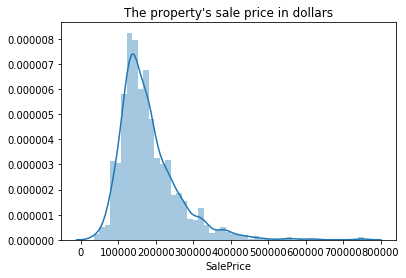

In [13]:
sns.distplot(data["SalePrice"])
plt.title("The property's sale price in dollars")

Text(0.5, 1.0, 'Overall material and finish quality')

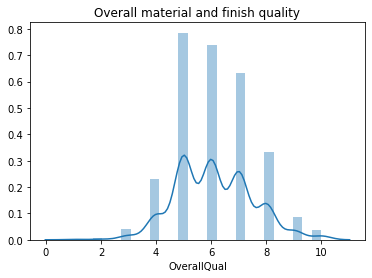

In [14]:
sns.distplot(data["OverallQual"])
plt.title("Overall material and finish quality")

Text(0.5, 1.0, 'First Floor square feet')

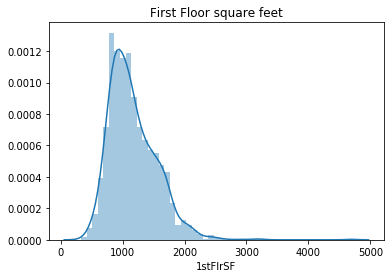

In [15]:
sns.distplot(data["1stFlrSF"])
plt.title("First Floor square feet")

Text(0.5, 1.0, 'Total rooms above grade')

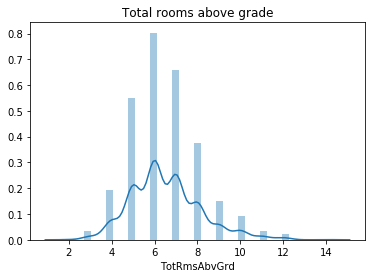

In [16]:
sns.distplot(data["TotRmsAbvGrd"])
plt.title("Total rooms above grade")

Text(0.5, 1.0, 'Original construction date')

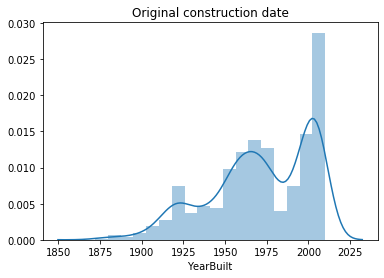

In [17]:
sns.distplot(data["YearBuilt"])
plt.title("Original construction date")

Text(0.5, 1.0, 'Linear feet of street connected to property')

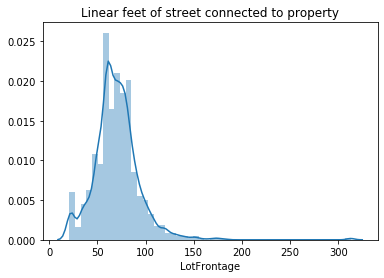

In [18]:
sns.distplot(data["LotFrontage"])
plt.title("Linear feet of street connected to property")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.791 entre SalePrice y OverallQual')

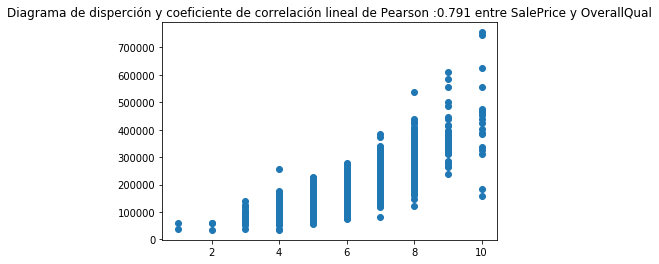

In [19]:
r = data.corr(method="pearson")["SalePrice"]["OverallQual"]
plt.scatter(data["OverallQual"],data["SalePrice"])
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y OverallQual")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.606 entre SalePrice y 1stFlrSF')

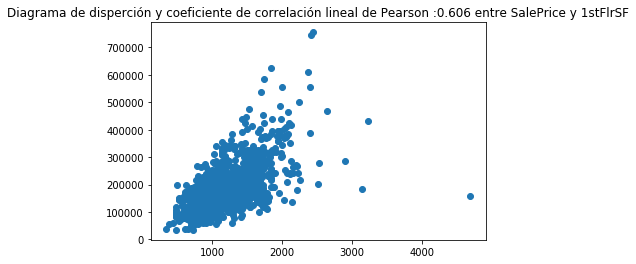

In [20]:
r = data.corr(method="pearson")["SalePrice"]["1stFlrSF"]
plt.scatter(data["1stFlrSF"],data["SalePrice"])
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y 1stFlrSF")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.534 entre SalePrice y TotRmsAbvGrd')

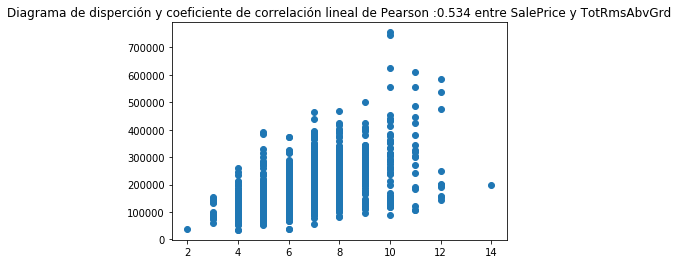

In [21]:
r = data.corr(method="pearson")["SalePrice"]["TotRmsAbvGrd"]
plt.scatter(data["TotRmsAbvGrd"],data["SalePrice"])
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y TotRmsAbvGrd")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.523 entre SalePrice y YearBuilt')

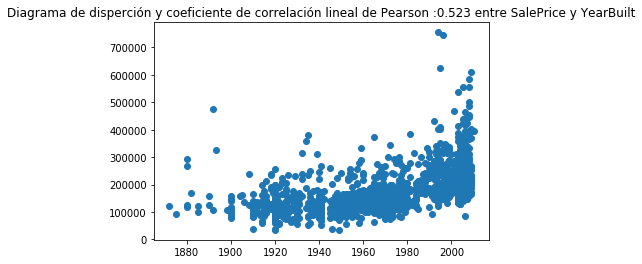

In [22]:
r = data.corr(method="pearson")["SalePrice"]["YearBuilt"]
plt.scatter(data["YearBuilt"],data["SalePrice"])
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y YearBuilt")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.352 entre SalePrice y LotFrontage')

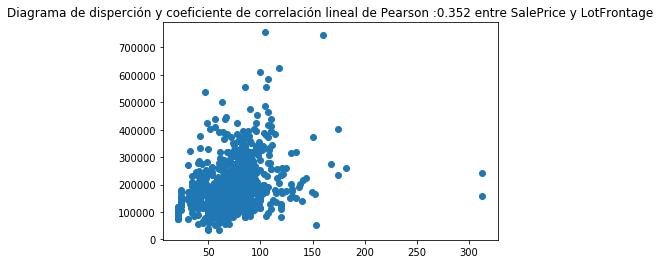

In [23]:
r = data.corr(method="pearson")["SalePrice"]["LotFrontage"]
plt.scatter(data["LotFrontage"],data["SalePrice"])
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y LotFrontage")

In [26]:
x = data["OverallQual"]

In [27]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

AttributeError: 'Series' object has no attribute 'reshape'